In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [6]:
data_df = pd.read_csv("C:/Users/Admin/OneDrive - ptit.edu.vn/Desktop/Data.csv")

In [7]:
data_df.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


## Data imputation(Missing Data Replacement)

In [8]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    10 non-null     object 
 1   Age        9 non-null      float64
 2   Salary     9 non-null      float64
 3   Purchased  10 non-null     object 
dtypes: float64(2), object(2)
memory usage: 452.0+ bytes


In [33]:
for col in data_df.columns:
    missing_data = data_df[col].isna().sum()
    missing_percent = missing_data / len(data_df) * 100
    print(f'Column: {col} has {missing_percent}%')

Column: Country has 0.0%
Column: Age has 10.0%
Column: Salary has 10.0%
Column: Purchased has 0.0%


<Axes: >

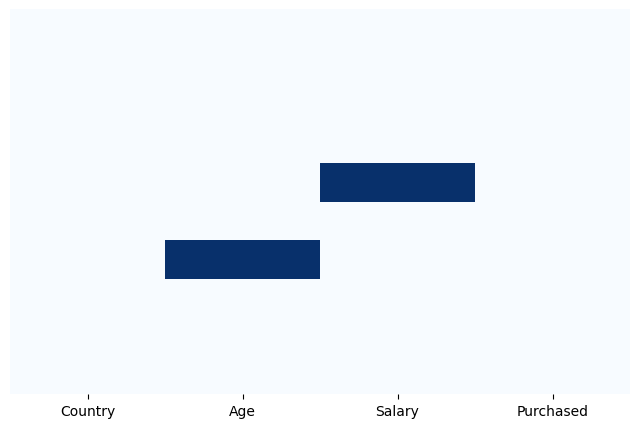

In [34]:
# use seaborn
fig, ax = plt.subplots(figsize = (8, 5))

sns.heatmap(data_df.isna(), cmap = "Blues", cbar = False, yticklabels=False)

In [35]:
data_df.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


In [76]:
X = data_df.iloc[:, :-1].values
# lấy cột cuối cùng


X

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, nan],
       ['France', 35.0, 58000.0],
       ['Spain', nan, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [77]:
# lấy cột cuối cùng
y = data_df.iloc[:, -1].values

y

array(['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes'],
      dtype=object)

In [46]:
from sklearn.impute import SimpleImputer
# sử dụng cho dữ liệu misising

In [79]:
# Create and instance of Class  SimpleImputer: np.NaN

imputer = SimpleImputer(missing_values = np.nan, strategy="mean")
imputer.fit(X[:, 1:3]) # lấy dữ liệu số
# Tính giá trị trung bình cho cột 1 và 2 (index 1:3)
X[:, 1:3] = imputer.transform(X[:, 1:3])
X
# transform điền giá trị trung bình thay NaN

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, 63777.77777777778],
       ['France', 35.0, 58000.0],
       ['Spain', 38.77777777777778, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

array([[0.0, 1.0, 0.0, 0.0, 44.0, 72000.0],
       [1.0, 0.0, 0.0, 1.0, 27.0, 48000.0],
       [1.0, 0.0, 1.0, 0.0, 30.0, 54000.0],
       [1.0, 0.0, 0.0, 1.0, 38.0, 61000.0],
       [1.0, 0.0, 1.0, 0.0, 40.0, 63777.77777777778],
       [0.0, 1.0, 0.0, 0.0, 35.0, 58000.0],
       [1.0, 0.0, 0.0, 1.0, 38.77777777777778, 52000.0],
       [0.0, 1.0, 0.0, 0.0, 48.0, 79000.0],
       [1.0, 0.0, 1.0, 0.0, 50.0, 83000.0],
       [0.0, 1.0, 0.0, 0.0, 37.0, 67000.0]], dtype=object)

## Encode Catergorical Data (Mã hóa)

### Encode Independent variable(X)

In [80]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


ct = ColumnTransformer(transformers= [('encoder', OneHotEncoder(), [0])], remainder = 'passthrough')
# sử dụng transformer là một tupe
# encode là chỉ để đặc tên
# OneHotEncoder()) để mã hóa dữ liệu phân loại
# [0] là cột áp dụng coojt thứ nhất
# remainder = passthrough nếu không có cái này thì khi in ra sẽ không hiện ra các giá trị khác 
# mà không transformer
X = ct.fit_transform(X)

# Columns Transformer : cho phép bạn áp dụng nhiều phép biến đổi khác nhau lên các cột khác nhau

#OneHotCoderL dùng để mã hóa dữ liệu phân loại (catergorical) thành các biến giả sẽ có giá trị 0 / 1

In [81]:
X

array([[1.0, 0.0, 0.0, 44.0, 72000.0],
       [0.0, 0.0, 1.0, 27.0, 48000.0],
       [0.0, 1.0, 0.0, 30.0, 54000.0],
       [0.0, 0.0, 1.0, 38.0, 61000.0],
       [0.0, 1.0, 0.0, 40.0, 63777.77777777778],
       [1.0, 0.0, 0.0, 35.0, 58000.0],
       [0.0, 0.0, 1.0, 38.77777777777778, 52000.0],
       [1.0, 0.0, 0.0, 48.0, 79000.0],
       [0.0, 1.0, 0.0, 50.0, 83000.0],
       [1.0, 0.0, 0.0, 37.0, 67000.0]], dtype=object)

### Encode Dependent Variable

In [70]:
y

array(['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes'],
      dtype=object)

In [22]:
y

array(['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes'],
      dtype=object)

In [89]:
from sklearn.preprocessing import LabelEncoder
# với Dependent

le = LabelEncoder()

y = le.fit_transform(y)
y

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1])

# Splitting the dataset(X = data, y = output) into the trainning Set and Test Set

In [90]:
# tastc thnafh training Set và test Set
from sklearn.model_selection import train_test_split
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) # lấy ngẫu nhiên các mẫu test
X_train

array([[1.0, 0.0, 0.0, 35.0, 58000.0],
       [1.0, 0.0, 0.0, 44.0, 72000.0],
       [1.0, 0.0, 0.0, 48.0, 79000.0],
       [0.0, 1.0, 0.0, 30.0, 54000.0],
       [1.0, 0.0, 0.0, 37.0, 67000.0],
       [0.0, 1.0, 0.0, 40.0, 63777.77777777778],
       [0.0, 0.0, 1.0, 38.0, 61000.0],
       [0.0, 0.0, 1.0, 38.77777777777778, 52000.0]], dtype=object)

In [62]:
# X_train và y_train là lấy ngẫu nhiên nhưng tuân theo thứ tự của nhau


AttributeError: 'numpy.ndarray' object has no attribute 'isna'

In [91]:
X


array([[1.0, 0.0, 0.0, 44.0, 72000.0],
       [0.0, 0.0, 1.0, 27.0, 48000.0],
       [0.0, 1.0, 0.0, 30.0, 54000.0],
       [0.0, 0.0, 1.0, 38.0, 61000.0],
       [0.0, 1.0, 0.0, 40.0, 63777.77777777778],
       [1.0, 0.0, 0.0, 35.0, 58000.0],
       [0.0, 0.0, 1.0, 38.77777777777778, 52000.0],
       [1.0, 0.0, 0.0, 48.0, 79000.0],
       [0.0, 1.0, 0.0, 50.0, 83000.0],
       [1.0, 0.0, 0.0, 37.0, 67000.0]], dtype=object)

In [92]:
X_train

array([[1.0, 0.0, 0.0, 35.0, 58000.0],
       [1.0, 0.0, 0.0, 44.0, 72000.0],
       [1.0, 0.0, 0.0, 48.0, 79000.0],
       [0.0, 1.0, 0.0, 30.0, 54000.0],
       [1.0, 0.0, 0.0, 37.0, 67000.0],
       [0.0, 1.0, 0.0, 40.0, 63777.77777777778],
       [0.0, 0.0, 1.0, 38.0, 61000.0],
       [0.0, 0.0, 1.0, 38.77777777777778, 52000.0]], dtype=object)

In [93]:
y_train

array([1, 0, 1, 0, 1, 1, 0, 0])

In [94]:
X_test

array([[0.0, 1.0, 0.0, 50.0, 83000.0],
       [0.0, 0.0, 1.0, 27.0, 48000.0]], dtype=object)

In [95]:
y_test

array([0, 1])

In [96]:
data_df

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


## Feature Scaling ( co giãn dữ liệu)

## There are 2 main Feature Scaling Technique: Standardisation and normalisation
## chính quy hóa và tieu chuẩn hóa


In [113]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train[:, 3:] = sc.fit_transform(X_train[:, 3:] )# co giãn age và salary sao cho phù hợp từ cột 3 đến cuối
X_test[:, 3:] = sc.transform(X_test[:, 3:] )


In [110]:
X_train

array([[1.0, 0.0, 0.0, -0.7529426005471074, -0.6260377781240922],
       [1.0, 0.0, 0.0, 1.0084538079529852, 1.013042950055349],
       [1.0, 0.0, 0.0, 1.7912966561752484, 1.8325833141450698],
       [0.0, 1.0, 0.0, -1.7314961608249366, -1.0943465576039326],
       [1.0, 0.0, 0.0, -0.3615211764359759, 0.4276569757055486],
       [0.0, 1.0, 0.0, 0.22561095973072168, 0.050408236680122134],
       [0.0, 0.0, 1.0, -0.16581046438041, -0.274806193514212],
       [0.0, 0.0, 1.0, -0.013591021670525302, -1.328500947343853]],
      dtype=object)

In [114]:
X_test

array([[0.0, 1.0, 0.0, 0.9999999999999998, 1.0],
       [0.0, 0.0, 1.0, -0.9999999999999998, -1.0]], dtype=object)